<span style="font-size:36px"><b>Baseline Model</b></span>

Copyright &copy; 2019 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [92]:
import numpy as np
import pandas as pd

from edapy.edapy import transformation

# Import Data

In [93]:
# Main database
application_train = pd.read_csv('csv/application_train.csv')
application_test = pd.read_csv('csv/application_test.csv')

# Previous application
previous_application = pd.read_csv('csv/previous_application.csv')
pos_cash_balance = pd.read_csv('csv/POS_CASH_balance.csv')
installments_payments = pd.read_csv('csv/installments_payments.csv')
cc_balance = pd.read_csv('csv/credit_card_balance.csv')

# Bureau data
bureau = pd.read_csv('csv/bureau.csv')
bureau_balance = pd.read_csv('csv/bureau_balance.csv')

# Baseline Main Application Data

See train and test data shape.

In [94]:
total_shape = application_train.shape[0] + application_test.shape[0]
print("application train shape: ", application_train.shape)
print("application test shape: ", application_test.shape)
print("train/test ratio: {:.3f}/{:.3f}".format(application_train.shape[0] / total_shape, application_test.shape[0] / total_shape))

application train shape:  (307511, 122)
application test shape:  (48744, 121)
train/test ratio: 0.863/0.137


In [95]:
col_ID = 'SK_ID_CURR'
col_target = 'TARGET'

## Data Preprocessing

* Check infinite values data, remove or convert to null if necessary
* Check duplicated data, remove them if necessary
* Check missing & null data, remove them if necessary
* Split numerical and categorical column

### Infinite Values

In [96]:
def get_infinite(df):
    infinite_df = df.isin([np.inf, -np.inf]).sum(axis=0).reset_index()
    infinite_df.columns = ['variable', 'infinite_values']
    infinite_df['non-inf factor (%)'] = (df.shape[0] - infinite_df['infinite_values'])/df.shape[0]*100
    infinite_df = infinite_df.sort_values('non-inf factor (%)').reset_index(drop=True)
    
    return infinite_df

In [97]:
get_infinite(application_train)

,variable,infinite_values,non-inf factor (%)
0,SK_ID_CURR,0,100.0
1,TOTALAREA_MODE,0,100.0
2,HOUSETYPE_MODE,0,100.0
3,FONDKAPREMONT_MODE,0,100.0
4,NONLIVINGAREA_MEDI,0,100.0
...,...,...,...
117,REG_REGION_NOT_LIVE_REGION,0,100.0
118,HOUR_APPR_PROCESS_START,0,100.0
119,WEEKDAY_APPR_PROCESS_START,0,100.0
120,REGION_RATING_CLIENT,0,100.0


In [98]:
get_infinite(application_test)

,variable,infinite_values,non-inf factor (%)
0,SK_ID_CURR,0,100.0
1,TOTALAREA_MODE,0,100.0
2,HOUSETYPE_MODE,0,100.0
3,FONDKAPREMONT_MODE,0,100.0
4,NONLIVINGAREA_MEDI,0,100.0
...,...,...,...
116,REG_REGION_NOT_LIVE_REGION,0,100.0
117,HOUR_APPR_PROCESS_START,0,100.0
118,WEEKDAY_APPR_PROCESS_START,0,100.0
119,YEARS_BEGINEXPLUATATION_MODE,0,100.0


### Duplicated Values

In [99]:
print("Total number of duplicated data: ", application_train.duplicated(subset=list(set(application_train.columns) - set(col_target))).sum())
print("Total number of duplicated data: ", application_test.duplicated(subset=list(set(application_test.columns) - set(col_target))).sum())

Total number of duplicated data:  0
Total number of duplicated data:  0


### Missing and Null Values

In [100]:
def get_missing(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['variable', 'missing values']
    missing_df['filling factor (%)'] = (df.shape[0] - missing_df['missing values'])/df.shape[0]*100
    missing_df = missing_df.sort_values('filling factor (%)').reset_index(drop = True)
    
    return missing_df

In [103]:
missing_df = get_missing(application_train).head(50)
missing_df

,variable,missing values,filling factor (%)
0,COMMONAREA_MEDI,214865,30.127703
1,COMMONAREA_MODE,214865,30.127703
2,COMMONAREA_AVG,214865,30.127703
3,NONLIVINGAPARTMENTS_AVG,213514,30.567037
4,NONLIVINGAPARTMENTS_MODE,213514,30.567037
5,NONLIVINGAPARTMENTS_MEDI,213514,30.567037
6,FONDKAPREMONT_MODE,210295,31.613828
7,LIVINGAPARTMENTS_MEDI,210199,31.645047
8,LIVINGAPARTMENTS_MODE,210199,31.645047
9,LIVINGAPARTMENTS_AVG,210199,31.645047


In [109]:
application_train.drop(columns=missing_df['variable'].to_list(), axis=1, inplace=True)

### Split Numerical & Categorical Data

In [110]:
transformation.convert_to_categorical(application_train)

Column TARGET casted to categorical
Column NAME_CONTRACT_TYPE casted to categorical
Column CODE_GENDER casted to categorical
Column FLAG_OWN_CAR casted to categorical
Column FLAG_OWN_REALTY casted to categorical
Column CNT_CHILDREN casted to categorical
Column NAME_TYPE_SUITE casted to categorical
Column NAME_INCOME_TYPE casted to categorical
Column NAME_EDUCATION_TYPE casted to categorical
Column NAME_FAMILY_STATUS casted to categorical
Column NAME_HOUSING_TYPE casted to categorical
Column FLAG_MOBIL casted to categorical
Column FLAG_EMP_PHONE casted to categorical
Column FLAG_WORK_PHONE casted to categorical
Column FLAG_CONT_MOBILE casted to categorical
Column FLAG_PHONE casted to categorical
Column FLAG_EMAIL casted to categorical
Column CNT_FAM_MEMBERS casted to categorical
Column REGION_RATING_CLIENT casted to categorical
Column REGION_RATING_CLIENT_W_CITY casted to categorical
Column WEEKDAY_APPR_PROCESS_START casted to categorical
Column REG_REGION_NOT_LIVE_REGION casted to cate

In [111]:
if (application_train[col_target].nunique() == 2):
    cols_num = list(set(application_train.select_dtypes(include=[np.number]).columns) - set([col_ID]))
    cols_cat = list(set(application_train.select_dtypes(exclude=[np.number]).columns) - set([col_target]))
else:
    cols_num = list(set(application_train.select_dtypes(include=[np.number]).columns) - set([col_ID, col_target]))
    cols_cat = list(set(application_train.select_dtypes(exclude=[np.number]).columns))

## Logistic Regression

In [112]:
for col in cols_cat:
    application_train = pd.concat([application_train, pd.get_dummies(application_train[col], prefix='d_'+col, drop_first=True)], axis=1)
    
cols_cat_d = application_train.columns[application_train.columns.str.startswith('d_')]
cols_feature = cols_num + list(cols_cat_d.values)

In [113]:
application_train = application_train.replace([np.inf, -np.inf, 'XNA'], np.nan)
application_train = application_train.dropna()

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def logistic_regression(X_train, X_test, y_train, y_test):
#     X_train[cols_num] = X_train[cols_num] / X_train[cols_num].max()
#     X_test[cols_num] = X_test[cols_num] / X_test[cols_num].max()
    
    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X_train, y_train)
    
    train_preds = log_reg.predict(X_train)
    test_preds = log_reg.predict(X_test)
    
    cm_train = confusion_matrix(y_train, train_preds)
    cm_test = confusion_matrix(y_test, test_preds)
    
    roc_auc_train = roc_auc_score(y_train, train_preds)
    roc_auc_test = roc_auc_score(y_test, test_preds)
    
    print(classification_report(y_train, train_preds))
    print()
    print(classification_report(y_test, test_preds))
    
    # ROC Curve
    y_train_sample_score = log_reg.decision_function(X_train)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_sample_score)
    y_pred_sample_score = log_reg.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc = auc(fpr,tpr)

    # Plot ROC
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    ax.plot(fpr_train, tpr_train, 'g', label='AUC_train = %0.3f'% roc_auc_train)
    ax.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1.0])
    ax.set_ylim([0,1.01])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    plt.show()
    
    return cm_train, cm_test, roc_auc_train, roc_auc_test

In [115]:
X_train, X_test, y_train, y_test = train_test_split(application_train[cols_feature], 
                                                    application_train[col_target], 
                                                    test_size=0.4, 
                                                    random_state=42, 
                                                    stratify=application_train[col_target])

D:\Anaconda2019\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda2019\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    110163
           1       0.00      0.00      0.00     10057

    accuracy                           0.92    120220
   macro avg       0.46      0.50      0.48    120220
weighted avg       0.84      0.92      0.88    120220


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73442
           1       0.00      0.00      0.00      6705

    accuracy                           0.92     80147
   macro avg       0.46      0.50      0.48     80147
weighted avg       0.84      0.92      0.88     80147



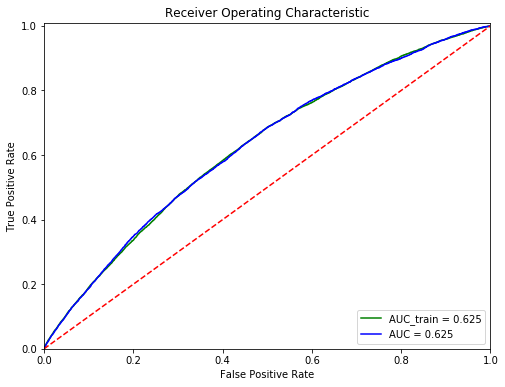

(array([[110163,      0],
        [ 10057,      0]], dtype=int64), array([[73442,     0],
        [ 6705,     0]], dtype=int64), 0.6249960196425504, 0.5)

In [116]:
logistic_regression(X_train, X_test, y_train, y_test)